# Approximation of functions in 2D


Text(0.5,1,'triplot of Delaunay triangulation')

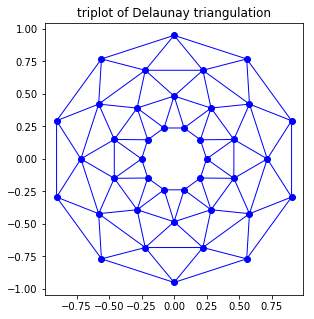

In [34]:
%matplotlib inline
import numpy as np
import matplotlib.tri as tri
from matplotlib import pyplot as plt

from numpy import sin, cos, pi

# First create the x and y coordinates of the points.
n_angles = 10
n_radii = 4
min_radius = 0.25
radii = np.linspace(min_radius, 0.95, n_radii)

angles = np.linspace(0, 2*pi, n_angles, endpoint=False)
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)
angles[:, 1::2] += pi/n_angles

x = (radii*cos(angles)).flatten()
y = (radii*sin(angles)).flatten()

# Create the Triangulation; no triangles so Delaunay triangulation created.
triang = tri.Triangulation(x, y)

# Mask off unwanted triangles.
xmid = x[triang.triangles].mean(axis=1)
ymid = y[triang.triangles].mean(axis=1)
mask = np.where(xmid*xmid + ymid*ymid < min_radius*min_radius, 1, 0)
triang.set_mask(mask)

# Plot the triangulation.
fig = plt.figure()
fig.set_size_inches(5,5)
fig.gca().set_aspect('equal')
plt.triplot(triang, 'bo-', lw=1)
plt.title('triplot of Delaunay triangulation')
